In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(df.drop('DEATH_EVENT',axis=1),df[['DEATH_EVENT']],test_size=0.3,random_state=1)

In [7]:
xtrain.shape

(209, 12)

In [8]:
xtest.shape

(90, 12)

In [9]:
ytest.head()

,DEATH_EVENT
173,0
287,0
51,1
146,0
214,0


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt=DecisionTreeClassifier()

In [12]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [13]:
pred=dt.predict(xtrain) #predicting training accuracy

In [14]:
ytrain.head()

,DEATH_EVENT
14,0
210,0
236,0
44,1
163,1


In [15]:
ytrain['pred']=pred #making a new column in ytrain to keep predicted training datas.

In [16]:
dt.score(xtrain,ytrain['DEATH_EVENT'])

1.0

In [17]:
pred2=dt.predict(xtest) #predicting testing accuracy

In [18]:
dt.score(xtest,ytest)

0.7888888888888889

In [19]:
ytest['pred2']=pred2

# confusion matrix

In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,plot_roc_curve

In [21]:
cr=classification_report(ytest['DEATH_EVENT'],pred2)

In [22]:
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.88      0.85        64
           1       0.65      0.58      0.61        26

    accuracy                           0.79        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.78      0.79      0.78        90



In [23]:
cm = confusion_matrix(ytest['DEATH_EVENT'],pred2)

In [24]:
print(cm)

[[56  8]
 [11 15]]


<AxesSubplot:>

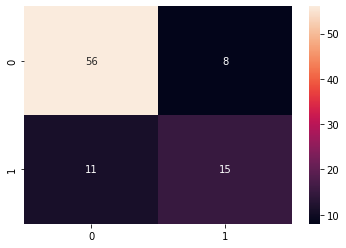

In [25]:
sns.heatmap(cm,annot=True)

In [26]:
tp,fp,fn,tn=confusion_matrix(ytest['DEATH_EVENT'],pred2).reshape(-1)

In [27]:
tp

56

In [28]:
fp

8

In [29]:
fn

11

In [30]:
tn

15

# Accuracy

In [31]:
accu=(tp+tn)/(tp+fp+fn+tn) 

In [32]:
accu

0.7888888888888889

# Precision or Positive Predictive Value (PPV)

In [33]:
Precision = tp / ( tp + fp )

In [34]:
Precision

0.875

# Sensitivity, Recall, Hit Rate, or True Positive Rate (TPR)

In [35]:
TPR = tp / (tp + fn)

In [36]:
TPR

0.835820895522388

# False Positive Rate (FPR) or 1-Specificity

In [37]:
FPR = fp/ (fp + tn)

In [38]:
FPR

0.34782608695652173

# Specificity, Selectivity or True Negative Rate (TNR)

In [39]:
TNR = tn / (tn + fp)

In [40]:
TNR

0.6521739130434783

# Threat Score (TS) or Critical Success Index (CSI)

In [41]:
TS = tp / (tp + fn + fp)

In [42]:
TS

0.7466666666666667

# False Discovery Rate (FDR)

In [43]:
FDR = fp / (tp + fp)

In [44]:
FDR

0.125

# F-Measure

In [46]:
F_measure = ( 2 * Precision * TPR) / (Precision + TPR)

In [47]:
F_measure

0.8549618320610687

C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


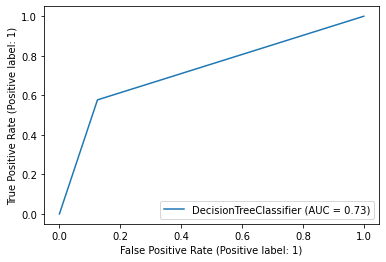

In [48]:
plot_roc_curve(dt,xtest,ytest['DEATH_EVENT'])

C:\Users\sharm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


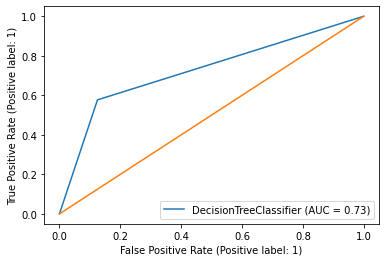

In [49]:
plot_roc_curve(dt,xtest,ytest['DEATH_EVENT'])
plt.plot([0,1],[0,1])